In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import naive_bayes


In [2]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
train_df = pd.read_csv("../mnist_naive_bayes/data/mnist_train.csv")
test_df = pd.read_csv("../mnist_naive_bayes/data/mnist_test.csv")

In [3]:
X_train_2d = train_df.drop("label", axis=1).values.reshape(60000, 28,28)
X_test_2d = test_df.drop("label", axis=1).values.reshape(10000, 28,28)
X_train_1d = X_train_2d.reshape(60000, 784)
X_test_1d = X_test_2d.reshape(10000, 784)
y_train = train_df["label"]
y_test = test_df["label"]

In [4]:
import scipy as sp

def shift(cpytest, scale=5, vertical=False):
    """
    Returns 2D images
    """
    n = scale  # Skalierungsvariable
    x = 2   # Richtung der Translation: 1 -> vertikal, 2 -> horizontal

    shift_array = [(n, 0), (-n, 0), (0, n), (0, -n)]
    x = np.random.randint(1, 4)
    shift_test = []
    if vertical is False:
        pass
    else:
        x=1
    for i in range(cpytest.shape[0]):
        
        shift_test.append(sp.ndimage.interpolation.shift(cpytest[i], [shift_array[x][0], shift_array[x][1]], cval=0,
                                                         mode='constant', order=0))
    return shift_test


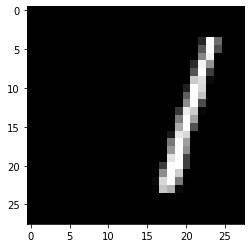

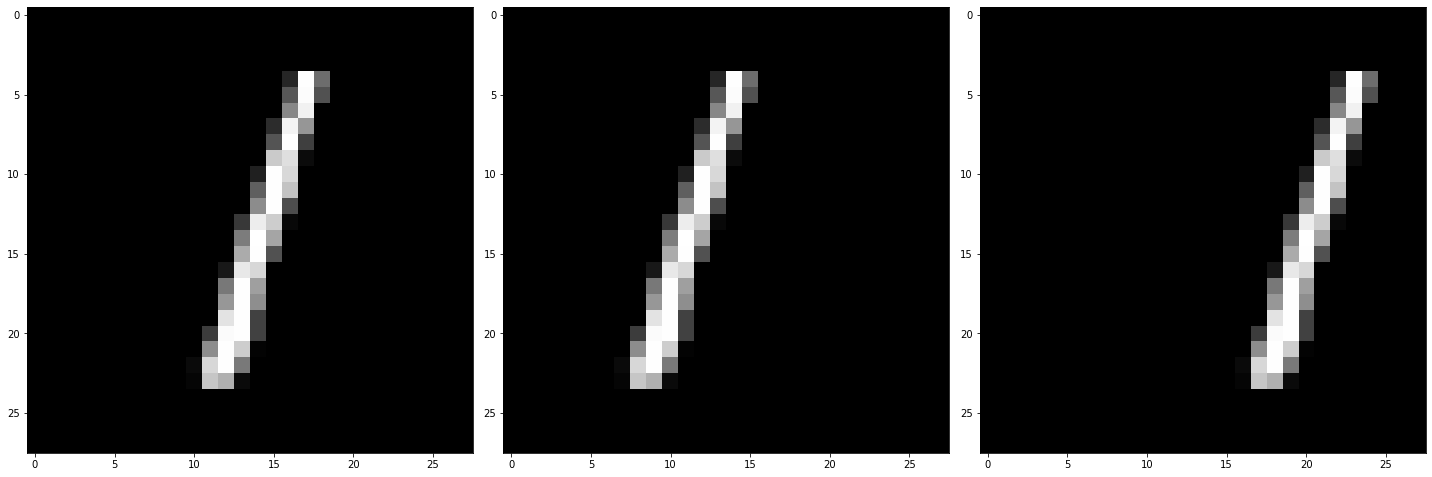

In [5]:
### SHIFT DEFAULT - 3 Pixel ###
norm = X_test_2d

# Shift horizontally
test_shift3 = shift(X_test_2d.copy(), scale=3)
test_shift6 = shift(X_test_2d.copy(), scale=6)
test_shiftv6 = shift(X_test_2d.copy(), scale=6, vertical=True)


import matplotlib.pyplot as plt
plt.imshow(test_shift6[2], cmap="gray")
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
plt.subplot(131)
plt.imshow(norm[2], cmap="gray")
plt.subplot(132)
plt.imshow(test_shift3[2], cmap="gray")
plt.subplot(133)
plt.imshow(test_shift6[2], cmap="gray")

fig.tight_layout()
plt.show()

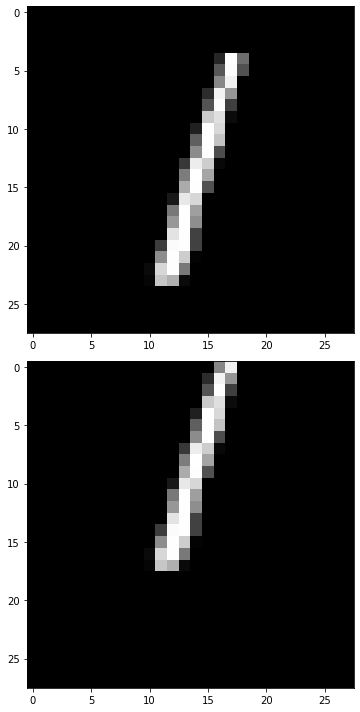

In [28]:

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,10))
plt.subplot(211)
plt.imshow(norm[2], cmap="gray")
plt.subplot(212)
plt.imshow(test_shiftv6[2], cmap="gray")

fig.tight_layout()
plt.show()

In [4]:
y_count = np.zeros(10)
for label in y_train:
    y_count[label] += 1

print("y_counts: ", y_count, y_count.sum(), "\n")

# Probabilities per Label
label_probs = y_count/y_count.sum()*100
for i in range(10):
    print(f"Probability for Class {i}: {label_probs[i]:.2f} %")

y_counts:  [5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.] 60000.0 

Probability for Class 0: 9.87 %
Probability for Class 1: 11.24 %
Probability for Class 2: 9.93 %
Probability for Class 3: 10.22 %
Probability for Class 4: 9.74 %
Probability for Class 5: 9.04 %
Probability for Class 6: 9.86 %
Probability for Class 7: 10.44 %
Probability for Class 8: 9.75 %
Probability for Class 9: 9.92 %


In [5]:
x_mid = (X_train_2d.shape[1]+1)/2
y_mid = (X_train_2d.shape[2]+1)/2
center = np.array((x_mid, y_mid))
print(center)

[14.5 14.5]


In [33]:
def get_euclidean_distance(arr, sort=False):
    """
    Function that transforms colored pixels to Euclidean distances
    """
    euclid_array = []

    for img in arr:
        x = 1
        new_img = []
        for row in img:
            y = 1
            # x_colored = 0
            distance_x = (pow(center[0] - x, 2))
            # print("dist x:", center[0] - x)
            for col in row:
                # y_colored = 0
                if col > 0:
                    distance_y = (pow(center[1] - y, 2))
                    # y_colored = 1
                    new_img.append(round(math.sqrt(distance_x+distance_y))) #, y_colored))
                else:
                    new_img.append(0)
                y += 1
            x += 1
        if sort is True:
            euclid_array.append(np.sort(new_img)[::-1])
        else:
            euclid_array.append(new_img)
    return euclid_array


In [34]:
def add_euclidean_dist_count(arr):
    new_list = []
    for img in arr:
        for num in img:
            new_list.append(num)
            new_list.append(list(img).count(num))
        for i in range(32):
            new_list.append(0)
    new_arr = np.array(new_list).reshape(len(arr), 1600)
    return new_arr

In [8]:
from sklearn.metrics import classification_report
from pathlib import Path

def train_test_data(mod:str,
                    model_selection: list,
                    X_train, y_train, X_test, y_test):
    for method in model_selection:
        model_name = str(method.__name__).upper()
        print(model_name, "\n")
        nb = method()
        nb.fit(X_train, y_train)
        pred = nb.predict(X_test)
        print("Never predicted values: ", set(y_test) - set(pred), "\n")
        # print(classification_report(y_test, pred, zero_division=0))
        print(f"{model_name}" + str(classification_report(y_test, pred, zero_division=0)))

        path = Path(f"../mnist_naive_bayes/data/{mod}.txt")
        with open (path, "a") as f:
            f.write(f"\n\n {mod}:\n {model_name}: " + str(classification_report(y_test, pred, zero_division=0)))

        print("\n\n")

In [9]:
import scipy as sp

def shift(cpytest):
    """
    Returns 2D images
    """
    n = 5  # Skalierungsvariable

    shift_array = [(n, 0), (-n, 0), (0, n), (0, -n)]
    x = np.random.randint(1, 4)
    shift_test = []

    for i in range(cpytest.shape[0]):
        x = 2
        shift_test.append(sp.ndimage.interpolation.shift(cpytest[i], [shift_array[x][0], shift_array[x][1]], cval=0,
                                                       mode='constant', order=0))

    return shift_test



In [10]:
from scipy.ndimage import rotate

def rotation(cpytest):
    """
    Returns 2D images
    """
    rotated = []
    for i in range(cpytest.shape[0]):
        rotated.append(rotate(cpytest[i], 90))
    return rotated

In [11]:
methods = [naive_bayes.MultinomialNB, naive_bayes.GaussianNB, naive_bayes.BernoulliNB]

## Default Accuracy

In [12]:
# Performance without manipulation
train_test_data("default", methods, X_train_1d[:10000], y_train[:10000], X_test_1d[:2000], y_test[:2000])


MULTINOMIALNB 

Never predicted values:  set() 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.91      0.90      0.91       175
           1       0.88      0.94      0.91       234
           2       0.89      0.79      0.83       219
           3       0.70      0.85      0.77       207
           4       0.82      0.67      0.74       217
           5       0.83      0.58      0.68       179
           6       0.84      0.84      0.84       178
           7       0.89      0.73      0.80       205
           8       0.61      0.66      0.63       192
           9       0.60      0.86      0.70       194

    accuracy                           0.78      2000
   macro avg       0.80      0.78      0.78      2000
weighted avg       0.80      0.78      0.78      2000




GAUSSIANNB 

Never predicted values:  set() 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.72      0.91      0.80       175
           

## Transform Pixel values to Euclidean Distance

In [13]:
"""
# Pixel value -> Euclidean distance to center

# Get Euclidean Distances of rotated Images
train_distances = np.array(get_euclidean_distance(X_train_2d[:10000], sort=True))
test_distances = np.array(get_euclidean_distance(X_test_2d[:2000], sort=True))

# Test accuracy
train_test_data(methods, train_distances, y_train[:10000], test_distances, y_test[:2000])
"""

'\n# Pixel value -> Euclidean distance to center\n\n# Get Euclidean Distances of rotated Images\ntrain_distances = np.array(get_euclidean_distance(X_train_2d[:10000], sort=True))\ntest_distances = np.array(get_euclidean_distance(X_test_2d[:2000], sort=True))\n\n# Test accuracy\ntrain_test_data(methods, train_distances, y_train[:10000], test_distances, y_test[:2000])\n'

## Rotation

In [14]:
# Rotate Test Data
test_rotated = rotation(X_test_2d[:2000])

# Get Euclidean Distances of rotated Images
train_distances = np.array(get_euclidean_distance(X_train_2d[:10000], sort=True))
test_rotated_distances = np.array(get_euclidean_distance(test_rotated, sort=True))

# Test accuracy
train_test_data("Rotation EUKLID", methods, train_distances, y_train[:10000], test_rotated_distances, y_test[:2000])


MULTINOMIALNB 

Never predicted values:  {8, 9, 5} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.35      0.34      0.35       175
           1       0.49      0.99      0.65       234
           2       0.16      0.19      0.17       219
           3       0.60      0.03      0.06       207
           4       0.11      0.11      0.11       217
           5       0.00      0.00      0.00       179
           6       0.11      0.10      0.10       178
           7       0.12      0.44      0.19       205
           8       0.00      0.00      0.00       192
           9       0.00      0.00      0.00       194

    accuracy                           0.23      2000
   macro avg       0.19      0.22      0.16      2000
weighted avg       0.20      0.23      0.17      2000




GAUSSIANNB 

Never predicted values:  {8, 9, 6} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.48      0.09      0.15       175
   

In [15]:
## ROTATION ADD DISTANCES COUNT
# Rotation Test Data
test_shift = rotation(X_test_2d)

# Get Euclidean Distances of rotated Images
train_distances = get_euclidean_distance(X_train_2d[:100], sort=True)
print("**TRAINING** Euclidean DISTANCE CALCULATED.")
train_distances2 = add_euclidean_dist_count(train_distances)

test_shift_distances = get_euclidean_distance(test_shift[:20], sort=True)
print("**TEST** Euclidean DISTANCE CALCULATED.")
test_shift_distances2 = add_euclidean_dist_count(test_shift_distances)

# Test accuracy
train_test_data("Rotation EUKLID + DISTANZ", methods, train_distances2, y_train[:100], test_shift_distances2, y_test[:20])

# print(np.array(train_distances).shape)

**TRAINING** Euclidean DISTANCE CALCULATED.
**TEST** Euclidean DISTANCE CALCULATED.
MULTINOMIALNB 

Never predicted values:  {2, 4, 6, 7} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
           9       0.25      0.25      0.25         4

    accuracy                           0.25        20
   macro avg       0.17      0.16      0.16        20
weighted avg       0.28      0.25      0.26        20




GAUSSIANNB 

Never predicted values:  {3, 4, 5} 

GAUSSIANNB              precision  

In [16]:
# Rotation Performance NO Euclidean

# Shift Test Data
test_rotated = rotation(X_test_2d[:2000])
test_rotated = np.array(test_rotated).reshape(2000, 784)

# Test accuracy
train_test_data("Rotation", methods, X_train_1d[:10000], y_train[:10000], test_rotated, y_test[:2000])

MULTINOMIALNB 

Never predicted values:  {1} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.23      0.58      0.33       175
           1       0.00      0.00      0.00       234
           2       0.08      0.05      0.06       219
           3       0.00      0.00      0.00       207
           4       0.08      0.34      0.13       217
           5       0.00      0.00      0.00       179
           6       0.01      0.02      0.01       178
           7       0.02      0.00      0.01       205
           8       0.03      0.02      0.02       192
           9       0.00      0.00      0.00       194

    accuracy                           0.10      2000
   macro avg       0.04      0.10      0.06      2000
weighted avg       0.04      0.10      0.05      2000




GAUSSIANNB 

Never predicted values:  set() 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.22      0.55      0.31       175
           1 

## Shift

In [17]:
# Shift Test Data
test_shift = shift(X_test_2d[:2000])

# Get Euclidean Distances of rotated Images
train_distances = get_euclidean_distance(X_train_2d[:10000], sort=True)
test_shift_distances = get_euclidean_distance(test_shift[:2000], sort=True)

# Test accuracy
train_test_data("Shift EUKLID", methods, train_distances, y_train[:10000], test_shift_distances, y_test[:2000])


MULTINOMIALNB 

Never predicted values:  {8, 9, 5} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.13      0.07      0.09       175
           1       0.45      0.94      0.61       234
           2       0.17      0.16      0.17       219
           3       0.06      0.00      0.01       207
           4       0.07      0.08      0.07       217
           5       0.00      0.00      0.00       179
           6       0.08      0.10      0.09       178
           7       0.13      0.47      0.20       205
           8       0.00      0.00      0.00       192
           9       0.00      0.00      0.00       194

    accuracy                           0.20      2000
   macro avg       0.11      0.18      0.12      2000
weighted avg       0.12      0.20      0.14      2000




GAUSSIANNB 

Never predicted values:  {8, 9, 4, 6} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.19      0.02      0.03       175


In [18]:
## SHIFT ADD DISTANCES COUNT
# Shift Test Data
test_shift = shift(X_test_2d)

# Get Euclidean Distances of rotated Images
train_distances = get_euclidean_distance(X_train_2d[:10000], sort=True)
print("**TRAINING** Euclidean DISTANCE CALCULATED.")
train_distances2 = add_euclidean_dist_count(train_distances)

test_shift_distances = get_euclidean_distance(test_shift[:2000], sort=True)
print("**TEST** Euclidean DISTANCE CALCULATED.")
test_shift_distances2 = add_euclidean_dist_count(test_shift_distances)

# Test accuracy
train_test_data("Shift EUKLID + DISTANZ COUNT", methods, train_distances2, y_train[:10000], test_shift_distances2, y_test[:2000])

# print(np.array(train_distances).shape)

**TRAINING** Euclidean DISTANCE CALCULATED.
**TEST** Euclidean DISTANCE CALCULATED.
MULTINOMIALNB 

Never predicted values:  {2, 4, 5} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.20      0.41      0.27       175
           1       0.66      0.92      0.77       234
           2       0.00      0.00      0.00       219
           3       0.50      0.00      0.01       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.13      0.11      0.12       178
           7       0.20      0.38      0.26       205
           8       0.13      0.30      0.19       192
           9       0.15      0.29      0.20       194

    accuracy                           0.25      2000
   macro avg       0.20      0.24      0.18      2000
weighted avg       0.21      0.25      0.19      2000




GAUSSIANNB 

Never predicted values:  {8, 9, 6} 

GAUSSIANNB              precision    r

In [19]:
# Shift Performance NO Euclidean

# Shift Test Data
test_shift = shift(X_test_2d[:2000])
test_shift = np.array(test_shift).reshape(2000, 784)

# Test accuracy
train_test_data("Shift", methods, X_train_1d[:10000], y_train[:10000], test_shift, y_test[:2000])


MULTINOMIALNB 

Never predicted values:  {1} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.00      0.00      0.00       234
           2       0.14      0.45      0.21       219
           3       0.06      0.00      0.01       207
           4       0.15      0.23      0.18       217
           5       0.21      0.59      0.30       179
           6       0.56      0.17      0.26       178
           7       1.00      0.02      0.05       205
           8       0.10      0.04      0.05       192
           9       0.47      0.04      0.07       194

    accuracy                           0.15      2000
   macro avg       0.27      0.15      0.11      2000
weighted avg       0.26      0.15      0.11      2000




GAUSSIANNB 

Never predicted values:  {1} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.04      0.05      0.04       175
           1   

In [108]:
# COL FILTER

# Shift Test Data
test_shift = shift(X_test_2d[:2000])
test_shift = np.array(test_shift)# .reshape(2000, 784)

# CIRCLE FILTER
test_blur_filter, train_blur_filter = rowblur(test_shift, X_train_2d[:10000])

# Test accuracy
train_test_data("Shift Row Filter", [naive_bayes.GaussianNB, naive_bayes.BernoulliNB], train_rotated_circlefilter, y_train[:10000], test_rotated_circlefilter, y_test[:2000])
# [naive_bayes.GaussianNB, naive_bayes.BernoulliNB]

GAUSSIANNB 

Never predicted values:  {0, 1, 3, 4, 5, 6, 7, 8, 9} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.00      0.00      0.00       234
           2       0.11      1.00      0.20       219
           3       0.00      0.00      0.00       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       205
           8       0.00      0.00      0.00       192
           9       0.00      0.00      0.00       194

    accuracy                           0.11      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.11      0.02      2000




BERNOULLINB 

Never predicted values:  {0, 1, 3, 4, 5, 6, 7, 8, 9} 

BERNOULLINB              precision    recall  f1-score   support

           0       0.00  

In [107]:
# COL FILTER

# Shift Test Data
test_shift = shift(X_test_2d[:2000])
test_shift = np.array(test_shift)# .reshape(2000, 784)

# CIRCLE FILTER
test_blur_filter, train_blur_filter = columnblur(test_shift, X_train_2d[:10000])

# Test accuracy
train_test_data("Shift Col Filter", [naive_bayes.GaussianNB, naive_bayes.BernoulliNB], train_rotated_circlefilter, y_train[:10000], test_rotated_circlefilter, y_test[:2000])
# [naive_bayes.GaussianNB, naive_bayes.BernoulliNB]

GAUSSIANNB 

Never predicted values:  {0, 1, 3, 4, 5, 6, 7, 8, 9} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.00      0.00      0.00       234
           2       0.11      1.00      0.20       219
           3       0.00      0.00      0.00       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       205
           8       0.00      0.00      0.00       192
           9       0.00      0.00      0.00       194

    accuracy                           0.11      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.11      0.02      2000




BERNOULLINB 

Never predicted values:  {0, 1, 3, 4, 5, 6, 7, 8, 9} 

BERNOULLINB              precision    recall  f1-score   support

           0       0.00  

In [106]:
# COL ROW FILTER

# Shift Test Data
test_shift = shift(X_test_2d[:2000])
test_shift = np.array(test_shift)# .reshape(2000, 784)

# CIRCLE FILTER
test_blur_filter, train_blur_filter = row_column_blur(test_shift, X_train_2d[:10000])

# Test accuracy
train_test_data("Shift Row+Col Filter", [naive_bayes.GaussianNB, naive_bayes.BernoulliNB], train_rotated_circlefilter, y_train[:10000], test_rotated_circlefilter, y_test[:2000])
# [naive_bayes.GaussianNB, naive_bayes.BernoulliNB]


GAUSSIANNB 

Never predicted values:  {0, 1, 3, 4, 5, 6, 7, 8, 9} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.00      0.00      0.00       234
           2       0.11      1.00      0.20       219
           3       0.00      0.00      0.00       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       205
           8       0.00      0.00      0.00       192
           9       0.00      0.00      0.00       194

    accuracy                           0.11      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.11      0.02      2000




BERNOULLINB 

Never predicted values:  {0, 1, 3, 4, 5, 6, 7, 8, 9} 

BERNOULLINB              precision    recall  f1-score   support

           0       0.00  

# Blurring 

In [44]:
import cv2

# Blurring der Testdaten
def blur(arr, size=(4,4)):
    for i in range(arr.shape[0]):
        arr[i] = cv2.blur(arr[i], size)
    return arr

## 4x4

In [45]:
## BLUR NO EUCLIDEAN
# Blur Test Data
test_blur = blur(X_test_2d[:2000], size=(4,4))
test_blur = np.array(test_blur).reshape(2000, 784)

# Test accuracy
train_test_data("Blur 4x4", methods, X_train_1d[:10000], y_train[:10000], test_blur, y_test[:2000])

MULTINOMIALNB 

Never predicted values:  {0, 1, 3, 6, 8} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.00      0.00      0.00       234
           2       0.09      0.06      0.07       219
           3       0.00      0.00      0.00       207
           4       0.34      0.50      0.40       217
           5       0.04      0.04      0.04       179
           6       0.00      0.00      0.00       178
           7       0.20      0.13      0.16       205
           8       0.00      0.00      0.00       192
           9       0.09      0.58      0.16       194

    accuracy                           0.13      2000
   macro avg       0.08      0.13      0.08      2000
weighted avg       0.08      0.13      0.09      2000




GAUSSIANNB 

Never predicted values:  {0, 1, 3, 6} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00     

In [46]:
test_blur = blur(X_test_2d[:2000], size=(4,4))

# Get Euclidean Distances of rotated Images
train_distances = get_euclidean_distance(X_train_2d[:10000], sort=True)

test_blur_distances = get_euclidean_distance(test_blur[:2000], sort=True)

# Test accuracy
train_test_data("Blur 4x4 EUKLID", methods, train_distances, y_train[:10000], test_blur_distances, y_test[:2000])

MULTINOMIALNB 

Never predicted values:  {1, 2, 3, 4, 5, 6, 7, 8, 9} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.09      1.00      0.16       175
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00       219
           3       0.00      0.00      0.00       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       205
           8       0.00      0.00      0.00       192
           9       0.00      0.00      0.00       194

    accuracy                           0.09      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.09      0.01      2000




GAUSSIANNB 

Never predicted values:  {1, 2, 3, 4, 5, 6, 7, 8, 9} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.

In [47]:
test_blur = blur(X_test_2d[:2000], size=(4,4))

# Get Euclidean Distances of rotated Images
train_distances = get_euclidean_distance(X_train_2d[:10000], sort=True)
print("**TRAINING** Euclidean DISTANCE CALCULATED.")
train_distances2 = add_euclidean_dist_count(train_distances)

test_blur_distances = get_euclidean_distance(test_blur[:2000], sort=True)
print("**TEST** Euclidean DISTANCE CALCULATED.")
test_blur_distances2 = add_euclidean_dist_count(test_shift_distances)

# Test accuracy
train_test_data("Blur 4x4 EUKLID + DISTANZ COUNT", methods, train_distances2, y_train[:10000], test_blur_distances2, y_test[:2000])

**TRAINING** Euclidean DISTANCE CALCULATED.
**TEST** Euclidean DISTANCE CALCULATED.
MULTINOMIALNB 

Never predicted values:  {2, 4, 5} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.20      0.41      0.27       175
           1       0.66      0.92      0.77       234
           2       0.00      0.00      0.00       219
           3       0.50      0.00      0.01       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.13      0.11      0.12       178
           7       0.20      0.38      0.26       205
           8       0.13      0.30      0.19       192
           9       0.15      0.29      0.20       194

    accuracy                           0.25      2000
   macro avg       0.20      0.24      0.18      2000
weighted avg       0.21      0.25      0.19      2000




GAUSSIANNB 

Never predicted values:  {8, 9, 6} 

GAUSSIANNB              precision    r

## 5x5

In [48]:
## BLUR NO EUCLIDEAN
# Blur Test Data
test_blur = blur(X_test_2d[:2000], size=(5,5))
test_blur = np.array(test_shift).reshape(2000, 784)

# Test accuracy
train_test_data("Blur 5x5", methods, X_train_1d[:10000], y_train[:10000], test_blur, y_test[:2000])

MULTINOMIALNB 

Never predicted values:  {1} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.00      0.00      0.00       234
           2       0.14      0.45      0.21       219
           3       0.06      0.00      0.01       207
           4       0.15      0.23      0.18       217
           5       0.21      0.59      0.30       179
           6       0.56      0.17      0.26       178
           7       1.00      0.02      0.05       205
           8       0.10      0.04      0.05       192
           9       0.47      0.04      0.07       194

    accuracy                           0.15      2000
   macro avg       0.27      0.15      0.11      2000
weighted avg       0.26      0.15      0.11      2000




GAUSSIANNB 

Never predicted values:  {1} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.04      0.05      0.04       175
           1   

In [49]:
test_blur = blur(X_test_2d[:2000], size=(5,5))

# Get Euclidean Distances of rotated Images
train_distances = get_euclidean_distance(X_train_2d[:10000], sort=True)

test_blur_distances = get_euclidean_distance(test_blur[:2000], sort=True)

# Test accuracy
train_test_data("Blur 5x5 EUKLID", methods, train_distances, y_train[:10000], test_blur_distances, y_test[:2000])

MULTINOMIALNB 

Never predicted values:  {1, 2, 3, 4, 5, 6, 7, 8, 9} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.09      1.00      0.16       175
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00       219
           3       0.00      0.00      0.00       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       205
           8       0.00      0.00      0.00       192
           9       0.00      0.00      0.00       194

    accuracy                           0.09      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.09      0.01      2000




GAUSSIANNB 

Never predicted values:  {1, 2, 3, 4, 5, 6, 7, 8, 9} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.

In [50]:
test_blur = blur(X_test_2d[:2000], size=(5,5))

# Get Euclidean Distances of rotated Images
train_distances = get_euclidean_distance(X_train_2d[:10000], sort=True)
print("**TRAINING** Euclidean DISTANCE CALCULATED.")
train_distances2 = add_euclidean_dist_count(train_distances)

test_blur_distances = get_euclidean_distance(test_blur[:2000], sort=True)
print("**TEST** Euclidean DISTANCE CALCULATED.")
test_blur_distances2 = add_euclidean_dist_count(test_shift_distances)

# Test accuracy
train_test_data("Blur 5x5 EUKLID +DISTANZ COUNT", methods, train_distances2, y_train[:10000], test_blur_distances2, y_test[:2000])

**TRAINING** Euclidean DISTANCE CALCULATED.
**TEST** Euclidean DISTANCE CALCULATED.
MULTINOMIALNB 

Never predicted values:  {2, 4, 5} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.20      0.41      0.27       175
           1       0.66      0.92      0.77       234
           2       0.00      0.00      0.00       219
           3       0.50      0.00      0.01       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.13      0.11      0.12       178
           7       0.20      0.38      0.26       205
           8       0.13      0.30      0.19       192
           9       0.15      0.29      0.20       194

    accuracy                           0.25      2000
   macro avg       0.20      0.24      0.18      2000
weighted avg       0.21      0.25      0.19      2000




GAUSSIANNB 

Never predicted values:  {8, 9, 6} 

GAUSSIANNB              precision    r

## 6x6 

In [51]:
## BLUR NO EUCLIDEAN
# Blur Test Data
test_blur = blur(X_test_2d[:2000], size=(6,6))
test_blur = np.array(test_shift).reshape(2000, 784)

# Test accuracy
train_test_data("Blur 6x6", methods, X_train_1d[:10000], y_train[:10000], test_blur, y_test[:2000])

MULTINOMIALNB 

Never predicted values:  {1} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.00      0.00      0.00       234
           2       0.14      0.45      0.21       219
           3       0.06      0.00      0.01       207
           4       0.15      0.23      0.18       217
           5       0.21      0.59      0.30       179
           6       0.56      0.17      0.26       178
           7       1.00      0.02      0.05       205
           8       0.10      0.04      0.05       192
           9       0.47      0.04      0.07       194

    accuracy                           0.15      2000
   macro avg       0.27      0.15      0.11      2000
weighted avg       0.26      0.15      0.11      2000




GAUSSIANNB 

Never predicted values:  {1} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.04      0.05      0.04       175
           1   

In [52]:
test_blur = blur(X_test_2d[:2000], size=(6,6))

# Get Euclidean Distances of rotated Images
train_distances = get_euclidean_distance(X_train_2d[:10000], sort=True)

test_blur_distances = get_euclidean_distance(test_blur[:2000], sort=True)

# Test accuracy
train_test_data("Blur 6x6 EUKLID", methods, train_distances, y_train[:10000], test_blur_distances, y_test[:2000])

MULTINOMIALNB 

Never predicted values:  {1, 2, 3, 4, 5, 6, 7, 8, 9} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.09      1.00      0.16       175
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00       219
           3       0.00      0.00      0.00       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       205
           8       0.00      0.00      0.00       192
           9       0.00      0.00      0.00       194

    accuracy                           0.09      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.09      0.01      2000




GAUSSIANNB 

Never predicted values:  {1, 2, 3, 4, 5, 6, 7, 8, 9} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.

In [53]:
test_blur = blur(X_test_2d[:2000], size=(6,6))

# Get Euclidean Distances of rotated Images
train_distances = get_euclidean_distance(X_train_2d[:10000], sort=True)
print("**TRAINING** Euclidean DISTANCE CALCULATED.")
train_distances2 = add_euclidean_dist_count(train_distances)

test_blur_distances = get_euclidean_distance(test_blur[:2000], sort=True)
print("**TEST** Euclidean DISTANCE CALCULATED.")
test_blur_distances2 = add_euclidean_dist_count(test_shift_distances)

# Test accuracy
train_test_data("Blur 6x6 EUKLID + DISTANZ COUNT", methods, train_distances2, y_train[:10000], test_blur_distances2, y_test[:2000])

**TRAINING** Euclidean DISTANCE CALCULATED.
**TEST** Euclidean DISTANCE CALCULATED.
MULTINOMIALNB 

Never predicted values:  {2, 4, 5} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.20      0.41      0.27       175
           1       0.66      0.92      0.77       234
           2       0.00      0.00      0.00       219
           3       0.50      0.00      0.01       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.13      0.11      0.12       178
           7       0.20      0.38      0.26       205
           8       0.13      0.30      0.19       192
           9       0.15      0.29      0.20       194

    accuracy                           0.25      2000
   macro avg       0.20      0.24      0.18      2000
weighted avg       0.21      0.25      0.19      2000




GAUSSIANNB 

Never predicted values:  {8, 9, 6} 

GAUSSIANNB              precision    r

In [54]:
# skeletonization
def skel(cpytest, cpytrain):
    cpytest = (cpytest != 0).astype(float)
    cpytrain = (cpytrain != 0).astype(float)

    for i in range(cpytest.shape[0]):
        cpytest[i] = cv2.blur(cpytest[i], (3, 3))

    for i in range(cpytrain.shape[0]):
        cpytrain[i] = skeletonize(cpytrain[i])

    for i in range(cpytest.shape[0]):
        cpytest[i] = skeletonize(cpytest[i])
    return cpytest, cpytrain

In [55]:
#sort (Pixel als Menge betrachten)
def sort_array(arr):
    for i in range(arr.shape[0]):
        arr[i] = np.sort(arr[i])
    return arr

In [56]:
# Input: ndarray of
def dirtyMNIST(number_array):
    n = 5  # Skalierungsvariable

    for i in range(number_array.shape[0]):
        random_matrix = np.zeros((28, 28))
        for j in range(n):
            z = np.random.randint(1, 255)
            x = np.random.randint(0, 28)
            y = np.random.randint(0, 28)
            random_matrix[x, y] += z
        number_array[i] = number_array[i] + random_matrix

    return number_array


In [64]:
# IMPORTANT: IMPORT BOTH FUNCTIONS
def count(testdata, traindata):
    testdata = (testdata != 0).astype(float)
    traindata = (traindata != 0).astype(float)

    trainlist = []
    testlist = []

    for j in range(testdata.shape[0]):
        testlist.append(np.array([np.sum(testdata[j]), 0]))

    for j in range(traindata.shape[0]):
        trainlist.append(np.array([np.sum(traindata[j]), 0]))

    return np.array(testlist), np.array(trainlist)


def countsum(testdata, traindata):
    testlist, trainlist = count(testdata, traindata)

    for i in range(testdata.shape[0]):
        testlist[i][1] = np.sum(testdata[i])

    for j in range(traindata.shape[0]):
        trainlist[j][1] = np.sum(traindata[j])

    return testlist, trainlist

In [65]:
# rowblur (testdata and traindata is 2 - dimensional)
def rowblur(testdata, traindata):
    testdata = (testdata != 0).astype(float)
    traindata = (traindata != 0).astype(float)

    trainlist = []
    testlist = []

    for i in range(testdata.shape[0]):
        buffer_list = []
        for j in range(testdata.shape[1]):
            buffer_list.append(np.sum(testdata[i, j]))
        testlist.append(buffer_list)

    for i in range(traindata.shape[0]):
        buffer_list = []
        for j in range(traindata.shape[1]):
            buffer_list.append(np.sum(traindata[i, j]))
        trainlist.append(buffer_list)

    return np.array(testlist), np.array(trainlist)

In [66]:
# columnblur (testdata and traindata is 2 - dimensional)

def columnblur(testdata, traindata):
    testdata = (testdata != 0).astype(float)
    traindata = (traindata != 0).astype(float)

    trainlist = []
    testlist = []

    for i in range(testdata.shape[0]):
        buffer_list = []
        for j in range(testdata.shape[1]):
            buffer_list.append(np.sum(testdata[i, :, j]))
        testlist.append(buffer_list)

    for i in range(traindata.shape[0]):
        buffer_list = []
        for j in range(traindata.shape[1]):
            buffer_list.append(np.sum(traindata[i, :, j]))
        trainlist.append(buffer_list)

    return np.array(testlist), np.array(trainlist)

In [67]:
# ALL FUNCTIONS NEEDED : row column blur is used for adding all rows and columns together
# Das ist der Zeilen, Spaltenfilter im Paper erwähnt
def columnblur_list(testdata, traindata):
    testdata = (testdata != 0).astype(float)
    traindata = (traindata != 0).astype(float)

    trainlist = []
    testlist = []

    for i in range(testdata.shape[0]):
        buffer_list = []
        for j in range(testdata.shape[1]):
            buffer_list.append(np.sum(testdata[i, :, j]))
        testlist.append(buffer_list)

    for i in range(traindata.shape[0]):
        buffer_list = []
        for j in range(traindata.shape[1]):
            buffer_list.append(np.sum(traindata[i, :, j]))
        trainlist.append(buffer_list)

    return testlist, trainlist


def rowblur_list(testdata, traindata):
    testdata = (testdata != 0).astype(float)
    traindata = (traindata != 0).astype(float)

    trainlist = []
    testlist = []

    for i in range(testdata.shape[0]):
        buffer_list = []
        for j in range(testdata.shape[1]):
            buffer_list.append(np.sum(testdata[i, j]))
        testlist.append(buffer_list)

    for i in range(traindata.shape[0]):
        buffer_list = []
        for j in range(traindata.shape[1]):
            buffer_list.append(np.sum(traindata[i, j]))
        trainlist.append(buffer_list)

    return testlist, trainlist

def row_column_blur(testdata, traindata):
    row_test, row_train = rowblur_list(testdata, traindata)
    column_test, column_train = columnblur_list(testdata, traindata)
    row_column_test = []
    row_column_train = []
    for i in range(row_test.__len__()):
        row_column_test.append(row_test[i] + column_test[i])

    for j in range(row_train.__len__()):
        row_column_train.append(row_train[j] + column_train[j])

    return np.array(row_column_test), np.array(row_column_train)


In [68]:
# takes in testdata and traindata as 2 dimensional pixel matrices --> returns filter values (filter used: circle)
# size_big == 1 uses (4,4) circle else (3,3) ----> generally higher accuracy with bigger circle
def circlefilter(testdata, traindata):
    size_big = 1
    test_list = []
    train_list = []

    if(size_big == 1):
        filter_shape = 4
        filter = np.zeros((4, 4)) - 1
        filter[0] = 1
        filter[3] = 1
        filter[:, 0] = 1
        filter[:, 3] = 1

    else:
        filter_shape = 3
        filter = np.zeros((3,3)) - 1
        filter[0] = 1
        filter[2] = 1
        filter[:, 0] = 1
        filter[:, 2] = 1

    for i in range(traindata.shape[0]):
        buffer_list = []
        for j in range(traindata.shape[1] - filter_shape):
            for k in range(traindata.shape[2] - filter_shape):
                x = 0
                for l in range(filter_shape):
                    for m in range(filter_shape):
                        x += traindata[i, j + m, k + l] * filter[m, l]
                buffer_list.append(x)
        train_list.append(buffer_list)

    for i in range(testdata.shape[0]):
        buffer_list = []
        for j in range(testdata.shape[1] - filter_shape):
            for k in range(testdata.shape[2] - filter_shape):
                x = 0
                for l in range(filter_shape):
                    for m in range(filter_shape):
                        x += testdata[i, j + m, k + l] * filter[m, l]
                buffer_list.append(x)
        test_list.append(buffer_list)

    return np.array(test_list), np.array(train_list)



In [93]:
from sklearn.preprocessing import MinMaxScaler


# Rotate Test Data
test_rotated = rotation(X_test_2d[:2000])
test_rotated = np.array(test_rotated) #.reshape(20, 784)

"""
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_1d[:100])
X_test_norm = scaler.fit_transform(test_rotated)
X_train_norm = X_train_norm.reshape(100, 784)
"""

# CIRCLE FILTER
test_rotated_circlefilter, train_rotated_circlefilter = circlefilter(test_rotated, X_train_2d[:10000])

# Test accuracy
train_test_data("Rotation CIRCLEFILTER", [naive_bayes.GaussianNB, naive_bayes.BernoulliNB], train_rotated_circlefilter, y_train[:10000], test_rotated_circlefilter, y_test[:2000])


GAUSSIANNB 

Never predicted values:  {0, 1, 3, 4, 5, 6, 7, 8, 9} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.00      0.00      0.00       234
           2       0.11      1.00      0.20       219
           3       0.00      0.00      0.00       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       205
           8       0.00      0.00      0.00       192
           9       0.00      0.00      0.00       194

    accuracy                           0.11      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.11      0.02      2000




BERNOULLINB 

Never predicted values:  {0, 1, 3, 4, 5, 6, 7, 8, 9} 

BERNOULLINB              precision    recall  f1-score   support

           0       0.00  

# Bildrauschen

In [99]:
# Noise Injection on Test Data
test_dirty = dirtyMNIST(X_test_2d[:2000])
test_dirty = np.array(test_dirty).reshape(2000, 784)
print(test_dirty.shape)

train_test_data("Bildrauschen", methods, X_train_1d[:10000], y_train[:10000], test_dirty, y_test[:2000])


(2000, 784)
MULTINOMIALNB 

Never predicted values:  {0, 1, 3, 6, 8} 

MULTINOMIALNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.00      0.00      0.00       234
           2       0.04      0.10      0.06       219
           3       0.00      0.00      0.00       207
           4       0.05      0.20      0.08       217
           5       0.09      0.06      0.07       179
           6       0.00      0.00      0.00       178
           7       0.12      0.00      0.01       205
           8       0.00      0.00      0.00       192
           9       0.08      0.19      0.11       194

    accuracy                           0.06      2000
   macro avg       0.04      0.06      0.03      2000
weighted avg       0.04      0.06      0.03      2000




GAUSSIANNB 

Never predicted values:  {0} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00  

In [103]:
# Noise Injection on Test Data
test_dirty = dirtyMNIST(X_test_2d[:2000])
test_dirty = np.array(test_dirty) #.reshape(20, 784)

# CIRCLE FILTER
test_blur_filter, train_blur_filter = row_column_blur(test_dirty, X_train_2d[:10000])

# Test accuracy
train_test_data("Bildrauschen Blur Filter - Row+Col", [naive_bayes.GaussianNB, naive_bayes.BernoulliNB], train_rotated_circlefilter, y_train[:10000], test_rotated_circlefilter, y_test[:2000])


GAUSSIANNB 

Never predicted values:  {0, 1, 3, 4, 5, 6, 7, 8, 9} 

GAUSSIANNB              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.00      0.00      0.00       234
           2       0.11      1.00      0.20       219
           3       0.00      0.00      0.00       207
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       205
           8       0.00      0.00      0.00       192
           9       0.00      0.00      0.00       194

    accuracy                           0.11      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.11      0.02      2000




BERNOULLINB 

Never predicted values:  {0, 1, 3, 4, 5, 6, 7, 8, 9} 

BERNOULLINB              precision    recall  f1-score   support

           0       0.00  

## 